# 1. BUSINESS UNDERSTANDING
Tahapan business understanding merupakan awal dari sebuah proyek data analytics. Tahapan ini akan dapat menghasilkan perencanaan sebuah proyek data analytics yang jelas tujuannya dengan pemahaman proses bisnis yang komprehensif.

rumah adalah bangunan yang berfungsi sebagai tempat tinggal atau hunian dan sarana pembinaan keluarga. Menurut John F.C Turner, 1972, dalam bukunya Freedom To Build mengatakan, “Rumah adalah bagian yang utuh dari permukiman, dan bukan hasil fisik sekali jadi semata, melainkan merupakan suatu proses yang terus berkembang dan terkait dengan mobilitas sosial ekonomi penghuninya dalam suatu kurun waktu.rumah adalah bangunan yang berfungsi sebagai tempat tinggal atau hunian dan sarana pembinaan keluarga. Jadi, selain berfungsi sebagai tempat tinggal atau hunian yang digunakan untuk berlindung dari gangguan iklim dan makhluk hidup lainnya, rumah merupakan tempat awal pengembangan kehidupan.Ada beberapa aspek yang harus diperahtikan dalam membeli rumah tentunya agar harga rumah tersebut dapat disesuaikan dengan budget kita. melalui beberapa data kita dapat mengetahui estimasi rumah yang ingin kita beli dengan menginput spesfikasi rumah. 
Disini saya bertujuan untuk membuat model estimasi harga rumah menggunakan data yang saya ambil dari situs kaggle.

Adapun Datasetnya saya ambil dari : https://www.kaggle.com/datasets/shree1992/housedata?select=data.csv House price prediction karya Shree yang kemudian saya jabarkan lagi dan di olah agar menghasilkan estimasi yang saya inginkan.

# 2. DATA UNDERSTANDING
Data understanding Secara garis besar, data understanding dipakai untuk memeriksa data sehingga dapat mengidentifikasi masalah pada data yang kita dapatkan. Tahapan ini memberikan pondasi analitik untuk sebuah penelitian dengan membuat ringkasan (summary) dan mengidentifikasi potensi masalah dalam data.

Varibel dari dataset ini yaitu ada:

 0   date           = Tanggal pengambilan data : object 

 1   price          = Harga Rumah : float64

 2   bedrooms       = jumlah Kamar Tidur : float64

 3   bathrooms      = Jumlah Kamar Mandi : float64

 4   sqft_living    = Luas Ruang Tamu : int64
   
 5   sqft_lot       = Luas Rumah : int64  

 6   floors         = Tingkat Lantai Rumah : float64

 7   waterfront     = Rumah Tepi Laut : int64  

 8   view           = Pemandangan Rumah : int64  

 9   condition      = Kondisi Rumah : int64  

 10  sqft_above     = Luas Lantai Atas : int64  

 11  sqft_basement  = Luas Ruang Bawah Tanah : int64  

 12  yr_built       = Tahung Dibangun : int64  

 13  yr_renovated   = Tahun Renovasi : int64  

 14  street         = Nama Jalan Rumah : object 

 15  city           = Nama Kota Rumah : object 

 16  statezip       = Kode POS rumah : object 
 
 17  country        = Nama Negara : object 



# Deskripsi Library Yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [10]:
df = pd.read_csv('data.csv')

# Deskripsi Dataset

In [11]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# 3. DATA PREPARATION
Data Preparation Secara garis besar, data preparation di kalangan data mining dipakai untuk memperbaiki masalah dalam data, kemudian membuat variabel turunan. Tahap data preparation sangat jelas untuk membutuhkan pemikiran yang cukup matang dan usaha yang cukup tinggi untuk memastikan data tepat sesuai dengan algoritma yang dipakai.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

<Axes: >

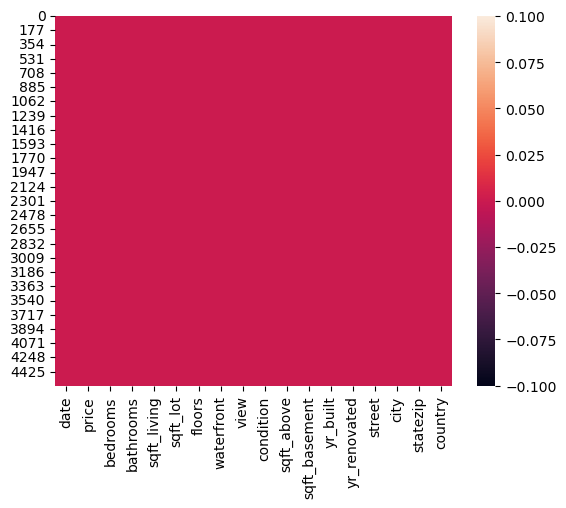

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


# Visualisasi Data

C:\Users\USER\AppData\Local\Temp\ipykernel_17080\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

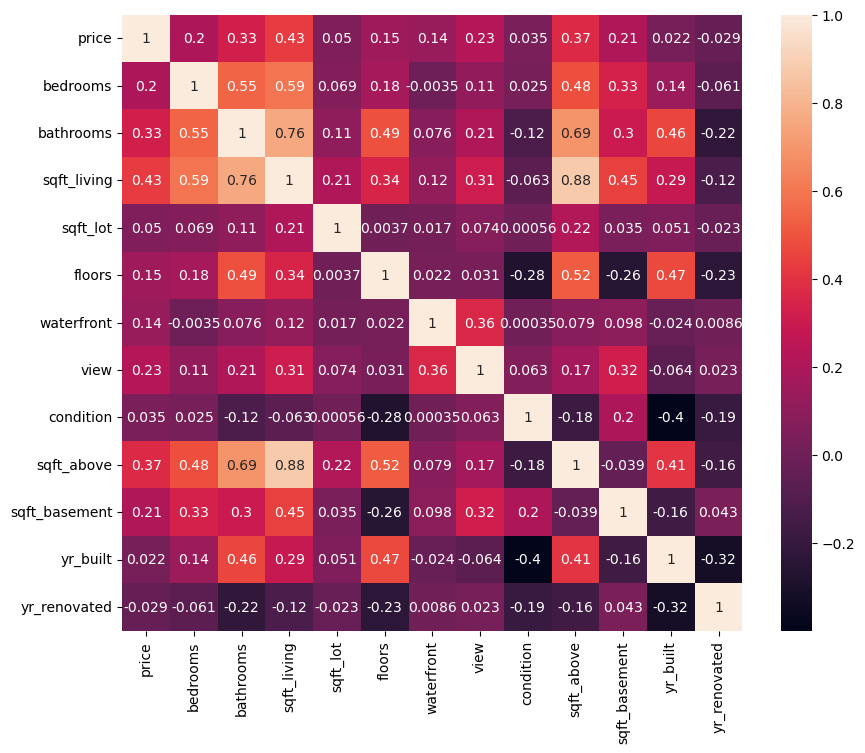

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Jumlah Rumah Berdasarkan city = Kota

In [16]:
city = df.groupby('city').count()[['bedrooms']].sort_values(by='bedrooms',ascending=True).reset_index()
city = city.rename(columns={'bedrooms':'House_City'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Snoqualmie Pass'),
  Text(1, 0, 'Beaux Arts Village'),
  Text(2, 0, 'Inglewood-Finn Hill'),
  Text(3, 0, 'Preston'),
  Text(4, 0, 'Milton'),
  Text(5, 0, 'Skykomish'),
  Text(6, 0, 'Yarrow Point'),
  Text(7, 0, 'Algona'),
  Text(8, 0, 'Pacific'),
  Text(9, 0, 'Ravensdale'),
  Text(10, 0, 'Black Diamond'),
  Text(11, 0, 'Clyde Hill'),
  Text(12, 0, 'Fall City'),
  Text(13, 0, 'Medina'),
  Text(14, 0, 'Normandy Park'),
  Text(15, 0, 'Carnation'),
  Text(16, 0, 'Enumclaw'),
  Text(17, 0, 'Vashon'),
  Text(18, 0, 'Tukwila'),
  Text(19, 0, 'SeaTac'),
  Text(20, 0, 'Bothell'),
  Text(21, 0, 'Newcastle'),
  Text(22, 0, 'Lake Forest Park'),
  Text(23, 0, 'Duvall'),
  Text(24, 0, 'Covington'),
  Text(25, 0, 'North Bend'),
  Text(26, 0, 'Des Moines'),
  Text(27, 0, 'Kenmore'),
  Text

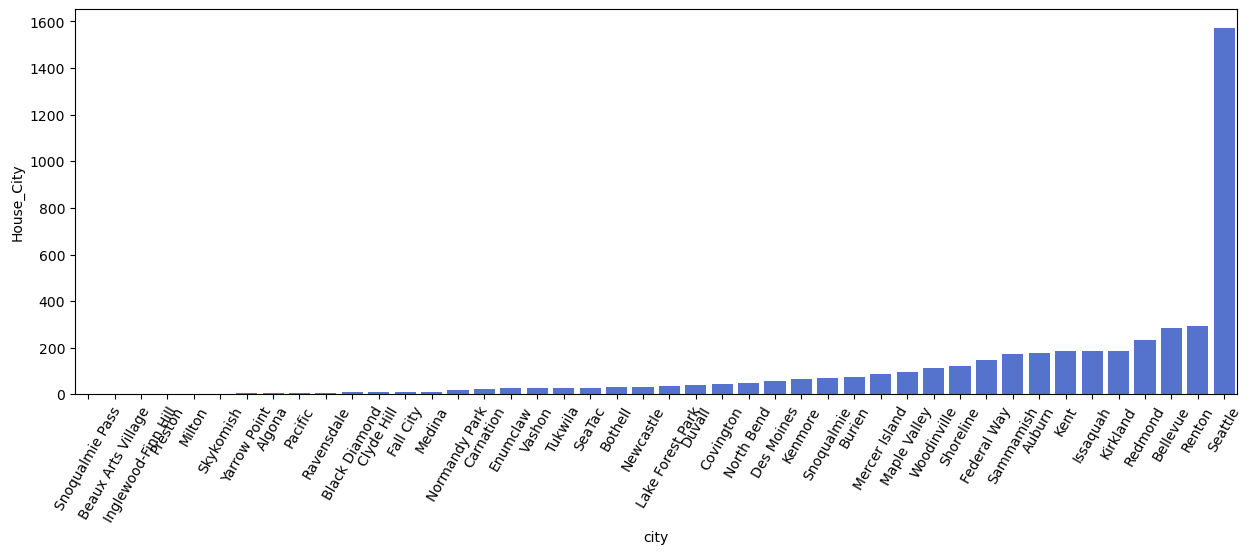

In [17]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=city['city'], y=city['House_City'], color='royalblue')
plt.xticks(rotation=60)

# Jumlah Rumah Berdasarkan street = Jalan

In [18]:
street = df.groupby('street').count()[['bedrooms']].sort_values(by='bedrooms').reset_index()
street = street.rename(columns={'bedrooms':'House_Street'})

<Axes: xlabel='street', ylabel='House_Street'>

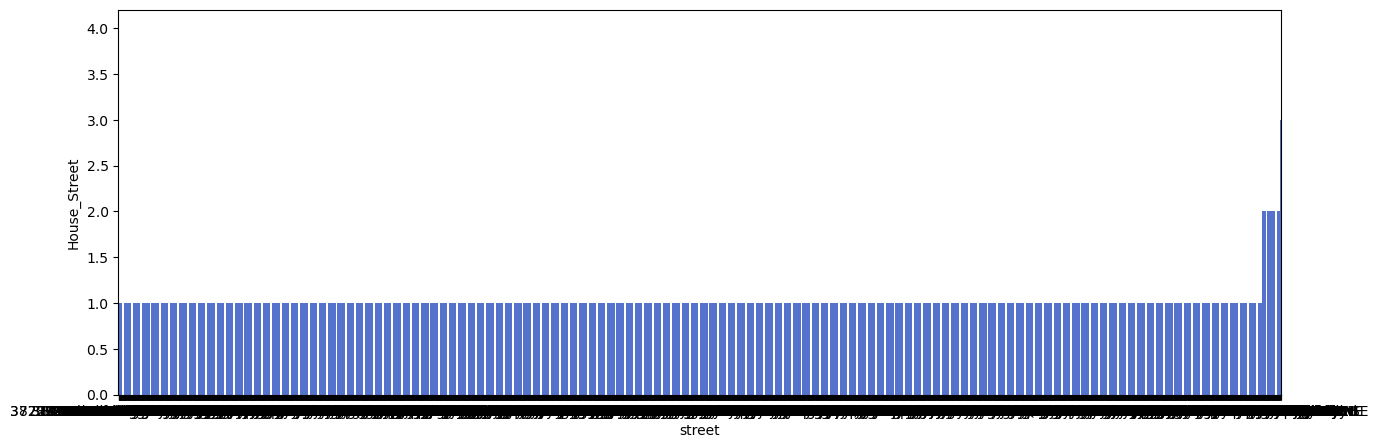

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x=street['street'], y=street['House_Street'], color='royalblue')

# Jumlah Rumah Berdasarkan statezip = Kode POS 

In [20]:
statezip = df.groupby('statezip').count()[['bedrooms']].sort_values(by='bedrooms').reset_index()
statezip = statezip.rename(columns={'bedrooms':'House_statezip'})

<Axes: xlabel='statezip', ylabel='House_statezip'>

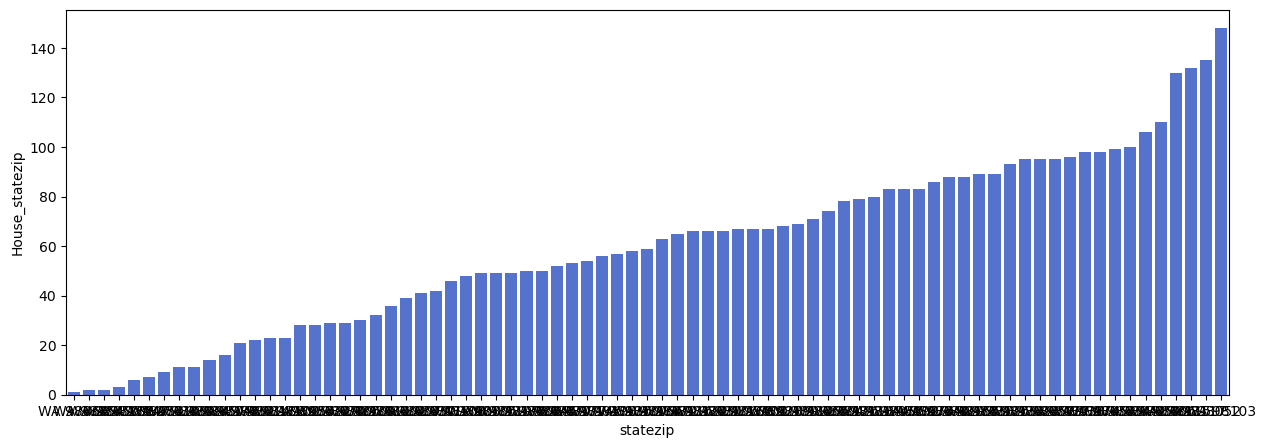

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(x=statezip['statezip'], y=statezip['House_statezip'], color='royalblue')

# Jumlah Rumah Berdasarkan country = Negara

In [22]:
country = df.groupby('country').count()[['bedrooms']].sort_values(by='bedrooms').reset_index()
country = country.rename(columns={'bedrooms':'House_country'})

<Axes: xlabel='country', ylabel='House_country'>

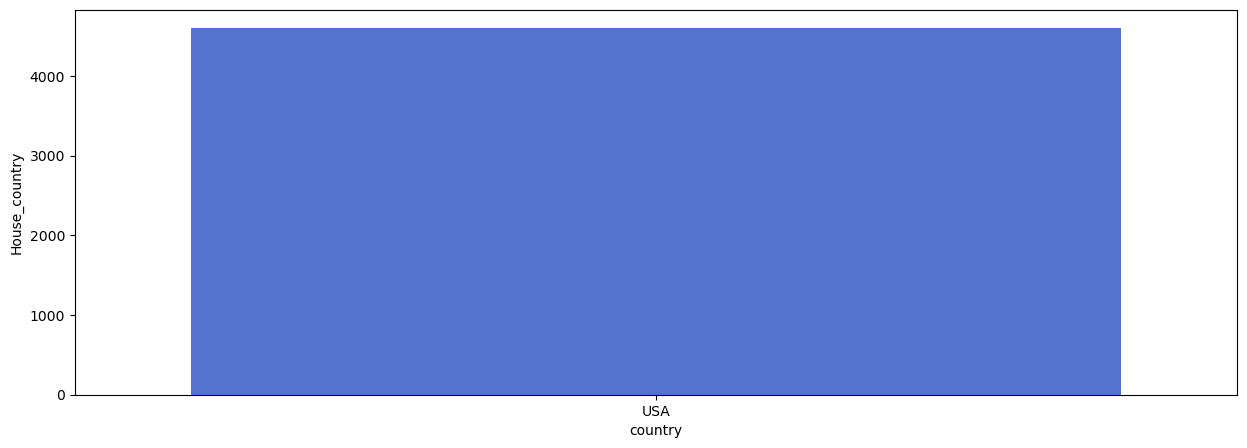

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(x=country['country'], y=country['House_country'], color='royalblue')

# Distribusi Harga

C:\Users\USER\AppData\Local\Temp\ipykernel_17080\3048279456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

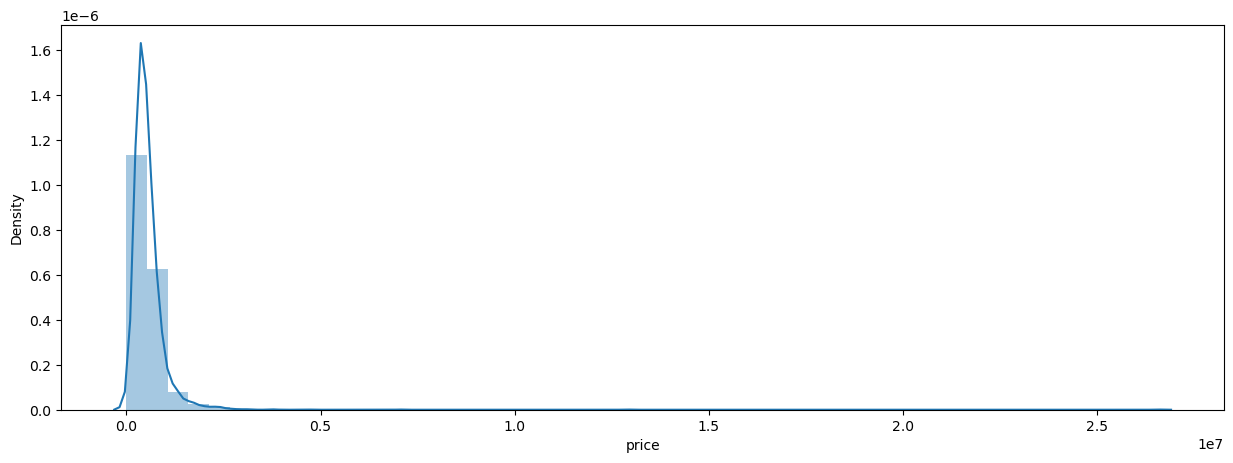

In [24]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

# 4. MODELLING DATA
Tahap keempat yaitu Modelling. Secara garis besar untuk membuat model prediktif atau deskriptif. Pada tahap ini dilakukan metode statistika dan Machine Learning untuk penentuan terhadap teknik data mining, alat bantu data mining, dan algoritma data mining yang akan diterapkan.

# Seleksi Fitur

In [25]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
x = df[features]
y = df['price']
x.shape, y.shape

((4600, 12), (4600,))

# Spill Data Training dan Data Testing

In [26]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(1150,)

# 5. EVALUATION DATA
Tahap kelima yaitu Evaluation. Setelah didapatkan sebuah atau beberapa model sehingga dilakukan penilaian terkait kualitas dan efektifitas-nya. 



# Membuat Model Regresi Linier

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [28]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.5188236128549353


# 6. DEPLOYMENT
Tahap terakhir dalam model adalah Deployment. Perencanaan untuk Deployment dimulai selama Business Understanding dan harus menggabungkan tidak hanya bagaimana untuk menghasilkan nilai model, tetapi juga bagaimana mengkonversi skor keputusan, dan bagaimana untuk menggabungkan keputusan dalam sistem operasional.

# Membuat Inputan Model Regresi Linier

In [29]:
#'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'
input_data = np.array([[3, 1, 1050, 6874, 1, 1, 1, 3, 1050, 280, 1954, 2005]])

prediction = lr.predict(input_data)
print('Jadi Estimasi Harga Rumah Yaitu :', prediction,'USD')

Jadi Estimasi Harga Rumah Yaitu : [560886.67677216] USD


c:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Save Model

In [31]:
import pickle

filename = 'estimasi_rumah.sav'
pickle.dump(lr,open(filename,'wb'))